In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('Iris.csv')


df = df.drop('Id', axis=1)


X = df.drop('Species', axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("--- Data Preparation Complete ---")
print(f"Training set size: {X_train_scaled.shape[0]} samples")
print(f"Testing set size: {X_test_scaled.shape[0]} samples")
print("\n")

--- Data Preparation Complete ---
Training set size: 120 samples
Testing set size: 30 samples




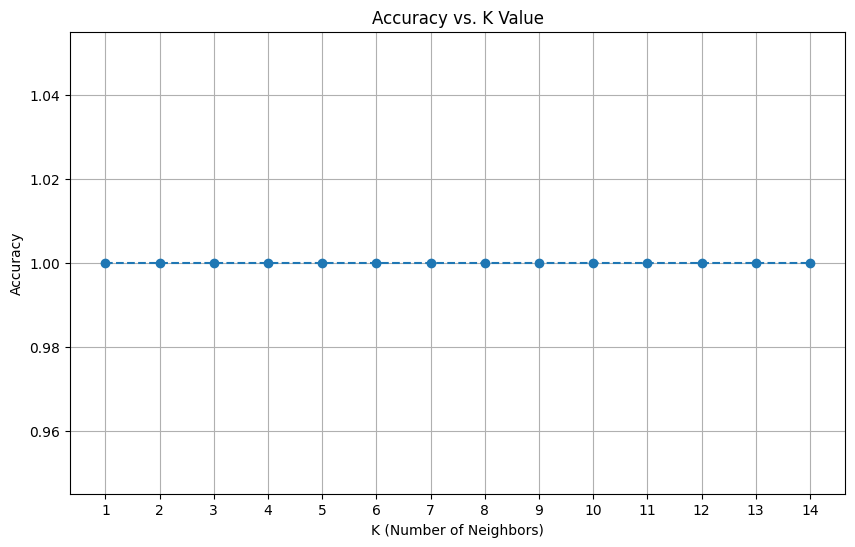

--- Experimenting with K Complete ---
The optimal value for K is: 1 with an accuracy of 1.00




In [ ]:
k_range = range(1, 15)
accuracy_scores = []


for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)
    

    knn.fit(X_train_scaled, y_train)

    y_pred = knn.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracy_scores, marker='o', linestyle='--')
plt.title('Accuracy vs. K Value')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()


best_k = k_range[np.argmax(accuracy_scores)]
print(f"--- Experimenting with K Complete ---")
print(f"The optimal value for K is: {best_k} with an accuracy of {max(accuracy_scores):.2f}")
print("\n")

--- Evaluating Final Model with K = 1 ---
Final Model Accuracy: 1.00
Confusion Matrix:


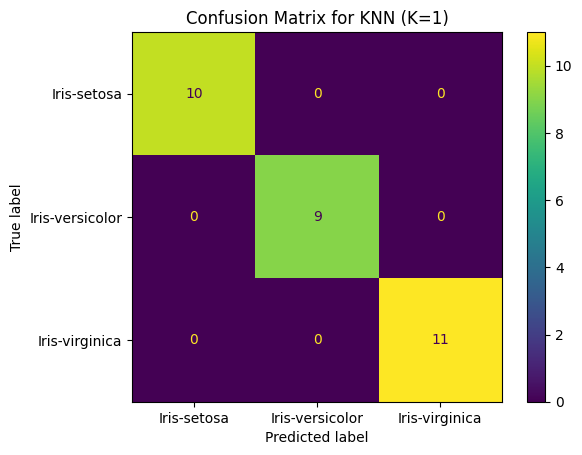

In [15]:
print(f"--- Evaluating Final Model with K = {best_k} ---")


final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

final_y_pred = final_knn.predict(X_test_scaled)


final_accuracy = accuracy_score(y_test, final_y_pred)
print(f"Final Model Accuracy: {final_accuracy:.2f}")


cm = confusion_matrix(y_test, final_y_pred, labels=final_knn.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_knn.classes_)

print("Confusion Matrix:")
display.plot()
plt.title(f'Confusion Matrix for KNN (K={best_k})')
plt.show()
print("\n")





--- Visualizing Decision Boundaries ---


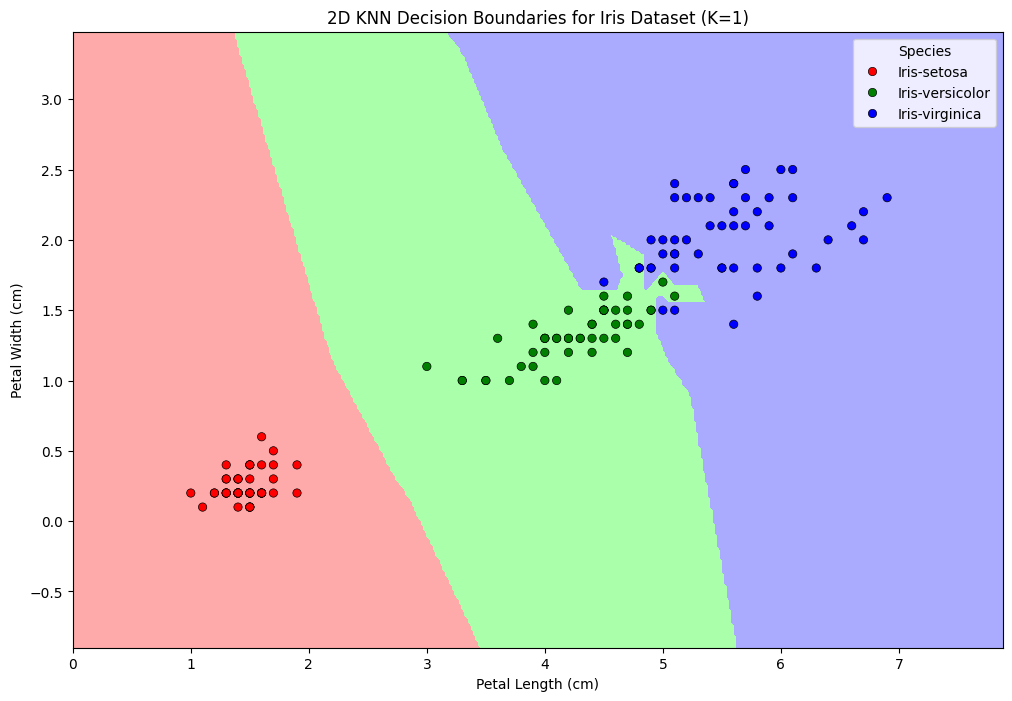

In [ ]:
print("--- Visualizing Decision Boundaries ---")

X_vis = df[['PetalLengthCm', 'PetalWidthCm']].values
y_vis = df['Species'].astype('category').cat.codes.values


knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_vis, y_vis)


x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light)

sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=df['Species'],
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f'2D KNN Decision Boundaries for Iris Dataset (K={best_k})')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.show()